Использую каталог: ../outputs/sd3-lora/images
Grid: rows=4 (folders) x cols=4 (files in first folder)
Saved collage to: ../outputs/sd3-lora/images/collage_grid.png


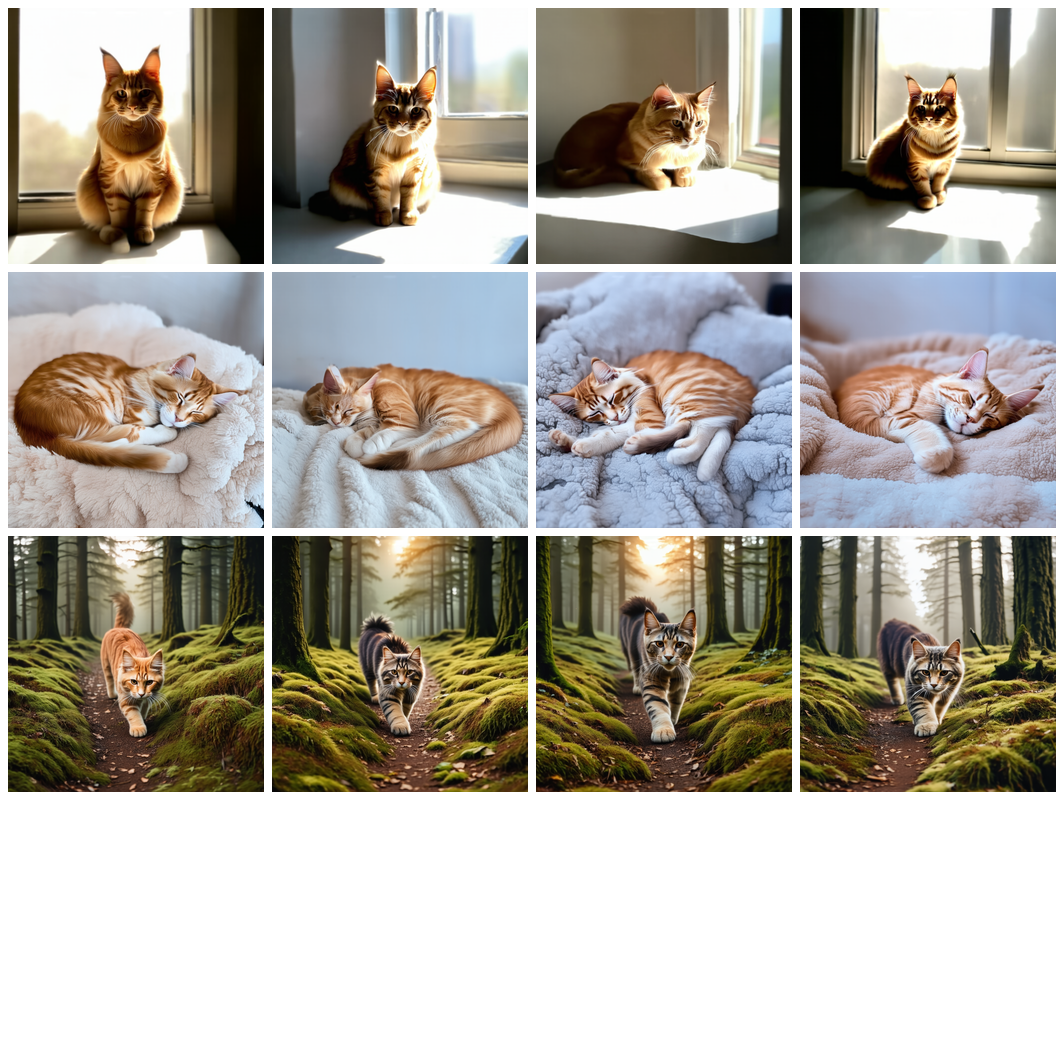

Download path: sandbox:../outputs/sd3-lora/images/collage_grid.png


In [5]:
# Jupyter cell: единый коллаж rows = #folders, cols = #files_in_first_folder
from pathlib import Path
from PIL import Image, ImageFile
from IPython.display import display
import io, math, os

ImageFile.LOAD_TRUNCATED_IMAGES = True

# ------------------ настройка ------------------
# Попробует найти 'sd3-lora-text-inference' автоматически.
# Если авто-поиск не сработает — замените base_dir на абсолютный путь и запустите снова.

base_dir = Path("../outputs/sd3-lora/images")
print("Использую каталог:", base_dir)

# Параметры коллажа
thumb_size = (256, 256)   # размер каждой плитки
pad = 8
bg_color = (255,255,255)
out_path = Path(base_dir, "collage_grid.png")  # куда сохранить итог

# Собираем подпапки и файлы
subfolders = sorted([p for p in base_dir.iterdir() if p.is_dir()])
if not subfolders:
    raise FileNotFoundError(f"Нет подпапок в {base_dir}")

first_imgs = sorted([f for f in subfolders[0].iterdir() if f.suffix.lower() in {".png",".jpg",".jpeg",".webp"}])
cols = max(1, len(first_imgs))
rows = len(subfolders)
print(f"Grid: rows={rows} (folders) x cols={cols} (files in first folder)")

def make_tile(path, size):
    try:
        im = Image.open(path).convert("RGB")
        im.thumbnail(size, Image.LANCZOS)
        tile = Image.new("RGB", size, bg_color)
        x = (size[0]-im.width)//2
        y = (size[1]-im.height)//2
        tile.paste(im, (x,y))
        return tile
    except Exception:
        # placeholder (white)
        return Image.new("RGB", size, bg_color)

tiles = []
for folder in subfolders:
    imgs = sorted([f for f in folder.iterdir() if f.suffix.lower() in {".png",".jpg",".jpeg",".webp"}])
    for i in range(cols):
        if i < len(imgs):
            tiles.append(make_tile(imgs[i], thumb_size))
        else:
            tiles.append(Image.new("RGB", thumb_size, bg_color))

# Создаём коллаж
collage_w = cols * thumb_size[0] + (cols + 1) * pad
collage_h = rows * thumb_size[1] + (rows + 1) * pad
collage = Image.new("RGB", (collage_w, collage_h), bg_color)

for i, tile in enumerate(tiles):
    r = i // cols
    c = i % cols
    x = pad + c * (thumb_size[0] + pad)
    y = pad + r * (thumb_size[1] + pad)
    collage.paste(tile, (x,y))

# Save and display
out_path.parent.mkdir(parents=True, exist_ok=True)
collage.save(out_path, format="PNG")
print("Saved collage to:", out_path)
display(collage.resize((min(collage.width, 1200), int(min(collage.width,1200) * collage.height / collage.width))))

print("Download path:", f"sandbox:{out_path}")


,folder,n_images,dropped,collage_path
0,000_a photo of _m-c_ cat sitting on a sunlit w...,5,,collages/000_a photo of _m-c_ cat sitting on a...
1,001_a photo of _m-c_ cat sleeping curled on a ...,5,,collages/001_a photo of _m-c_ cat sleeping cur...
2,002_a photo of _m-c_ cat walking on a mossy fo...,0,,



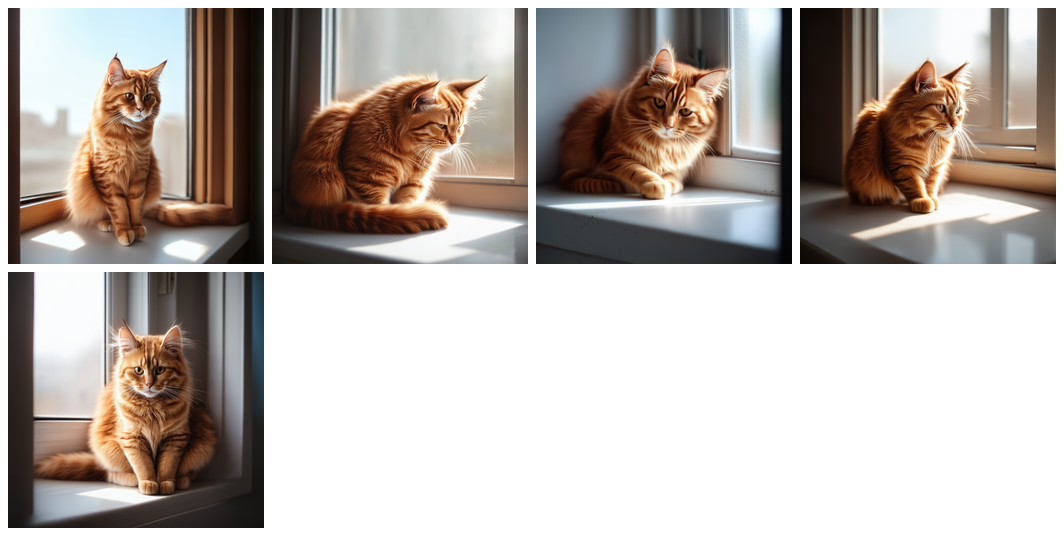
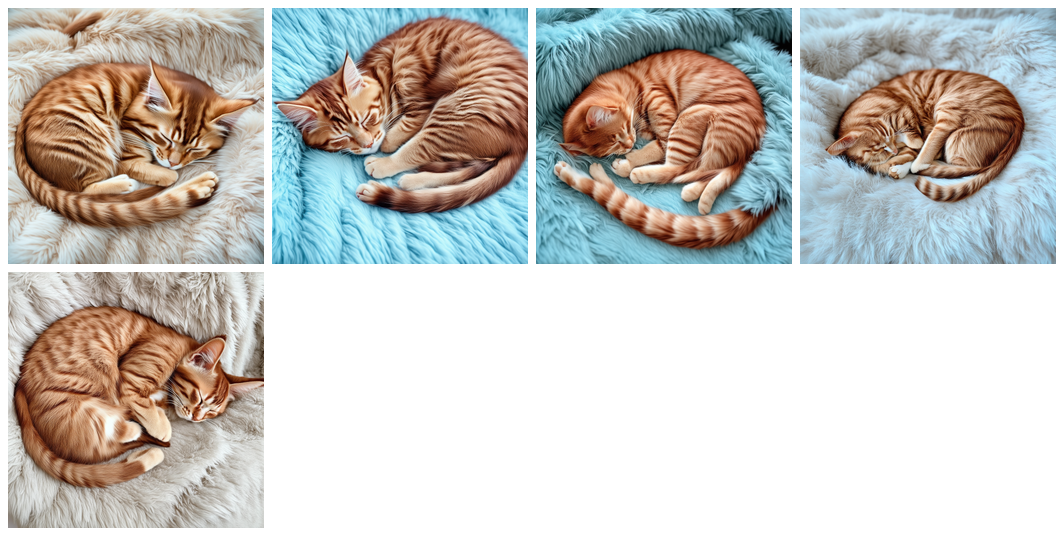

Saved collages to: /home/dasha/diffusers/examples/dreambooth/dreambooth-tutorial/notebooks/collages
Download link(s) example: sandbox:/home/dasha/diffusers/examples/dreambooth/dreambooth-tutorial/notebooks/collages


In [7]:
# Jupyter cell: создать коллажи (grid) для каждой подпапки и показать их inline
from pathlib import Path
from PIL import Image, ImageFile
from IPython.display import display, HTML
import math, io, base64
import pandas as pd

# ---------- НАСТРОЙКИ ----------
# По умолчанию ищем там, где ты показывал раньше — поменяй, если нужно:
base_dir = Path("../outputs/sd3-lora-text-inference")  # <-- поменяй путь если нужно
out_dir = Path("collages")                  # куда сохранять коллажи (доступно для скачивания)
thumb_size = (256, 256)       # размер тайла в сетке
max_cols = 4                  # максимум столбцов в сетке
pad = 8                       # отступ между тайлами (px)
bg_color = (255,255,255)      # фон коллажа
ImageFile.LOAD_TRUNCATED_IMAGES = True
# --------------------------------

if not base_dir.exists():
    raise FileNotFoundError(f"Base directory not found: {base_dir}. Измени base_dir и запусти снова.")

out_dir.mkdir(parents=True, exist_ok=True)

def make_thumbnail(img_path, size):
    try:
        img = Image.open(img_path).convert("RGB")
        img.thumbnail(size, Image.LANCZOS)
        tile = Image.new("RGB", size, bg_color)
        x = (size[0] - img.width) // 2
        y = (size[1] - img.height) // 2
        tile.paste(img, (x, y))
        return tile
    except Exception:
        return None

rows = []
html_blocks = []

for folder in sorted([p for p in base_dir.iterdir() if p.is_dir()]):
    imgs = sorted([p for p in folder.iterdir() if p.suffix.lower() in {".png", ".jpg", ".jpeg", ".webp"}])
    tiles = []
    dropped = []
    for p in imgs:
        t = make_thumbnail(p, thumb_size)
        if t is not None:
            tiles.append((p, t))
        else:
            dropped.append(p.name)

    n = len(tiles)
    if n == 0:
        rows.append({"folder": folder.name, "n_images": 0, "dropped": ", ".join(dropped), "collage_path": ""})
        continue

    cols = min(max_cols, n)
    rows_count = math.ceil(n / cols)
    collage_w = cols * thumb_size[0] + (cols + 1) * pad
    collage_h = rows_count * thumb_size[1] + (rows_count + 1) * pad
    collage = Image.new("RGB", (collage_w, collage_h), bg_color)

    for idx, (p, tile) in enumerate(tiles):
        r = idx // cols
        c = idx % cols
        x = pad + c * (thumb_size[0] + pad)
        y = pad + r * (thumb_size[1] + pad)
        collage.paste(tile, (x, y))

    safe_name = "".join(c if (c.isalnum() or c in " _-") else "_" for c in folder.name)[:120]
    out_path = out_dir / f"{safe_name}.png"
    collage.save(out_path, format="PNG")

    # inline preview (base64)
    buf = io.BytesIO()
    collage.save(buf, format="PNG")
    b64 = base64.b64encode(buf.getvalue()).decode("ascii")
    data_uri = f"data:image/png;base64,{b64}"

    html = f"<h3 style='font-family:sans-serif'>{folder.name} — {n} images (dropped: {len(dropped)})</h3>"
    html += f"<div style='margin-bottom:18px'><a href='file://{out_path}' target='_blank'>"
    html += f"<img src='{data_uri}' style='max-width:100%; height:auto; border:1px solid #ddd' /></a></div>"
    if dropped:
        html += "<div style='font-family:monospace; color:#b00'>Dropped (couldn't open): " + ", ".join(dropped) + "</div>"

    html_blocks.append(html)
    rows.append({"folder": folder.name, "n_images": n, "dropped": ", ".join(dropped), "collage_path": str(out_path)})

# show summary table and inline collages
df = pd.DataFrame(rows)
display(df)
display(HTML("<div style='font-family:sans-serif'>" + "\n".join(html_blocks) + "</div>"))

print("Saved collages to:", out_dir.resolve())
print("Download link(s) example:", f"sandbox:{out_dir.resolve()}")
